In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Specify the file path of your Excel file
file_path = "econ372_hwk3.xlsx"

# Load the Excel file into a pandas DataFrame
try:
    # Read the Excel file
    data = pd.read_excel(file_path)
    
    # Now 'data' contains your Excel file data, and you can manipulate/process it as needed
    print(data.head())  # Print the first 5 rows of the DataFrame for verification
except FileNotFoundError:
    print("The specified Excel file was not found.")
except PermissionError:
    print("You don't have permission to read the Excel file.")
except Exception as e:
    print("An error occurred:", str(e))


   provider_number                  street    city state      zip  beds  \
0            10001  1108 ROSS CLARK CIRCLE  DOTHAN    AL  36301.0   425   
1            10001  1108 ROSS CLARK CIRCLE  DOTHAN    AL  36301.0   400   
2            10001  1108 ROSS CLARK CIRCLE  DOTHAN    AL  36301.0   353   
3            10001  1108 ROSS CLARK CIRCLE  DOTHAN    AL  36301.0   353   
4            10001  1108 ROSS CLARK CIRCLE  DOTHAN    AL  36301.0   353   

   tot_discharges        price  year  hrr   mkt  
0         16812.0  5298.301254  1998  2.0  11.0  
1         17876.0  3903.631715  1999  2.0  11.0  
2         17202.0  3902.972237  2000  2.0  11.0  
3         19477.0  3211.728081  2001  2.0  11.0  
4         19881.0  4255.351889  2002  2.0  11.0  


In [3]:
# Calculate total discharges by zip code
total_discharges_by_zip = data.groupby(['year', 'zip'])['tot_discharges'].sum()

# Calculate market shares
data['mkt_share'] = data['tot_discharges'] / data.groupby(['year', 'zip'])['tot_discharges'].transform('sum')


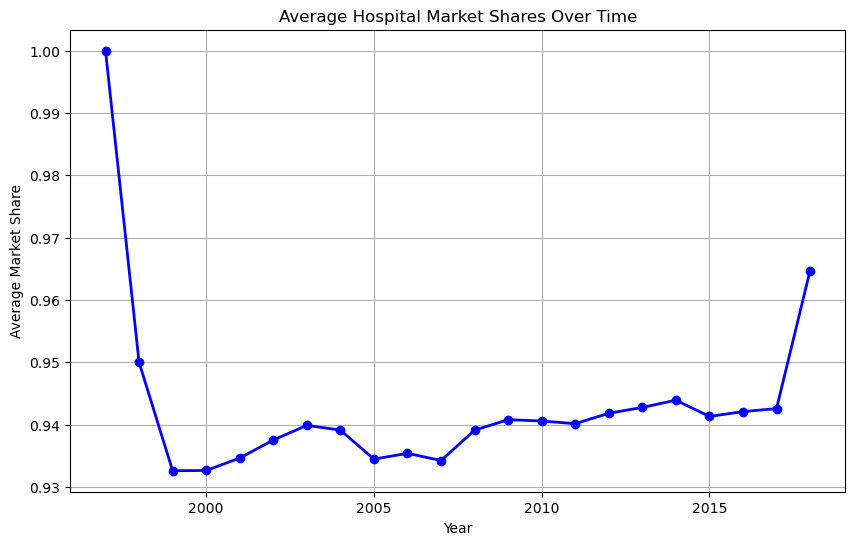

In [4]:
# Calculate average market shares over time
average_mkt_shares = data.groupby('year')['mkt_share'].mean()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_mkt_shares.index, average_mkt_shares.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Average Hospital Market Shares Over Time')
plt.xlabel('Year')
plt.ylabel('Average Market Share')
plt.grid(True)
plt.show()


In [68]:
# Calculate total discharges by HRR
total_discharges_by_hrr = data.groupby(['year', 'hrr'])['tot_discharges'].sum()

# Calculate market shares
data['mkt_share'] = data['tot_discharges'] / data.groupby(['year', 'hrr'])['tot_discharges'].transform('sum')


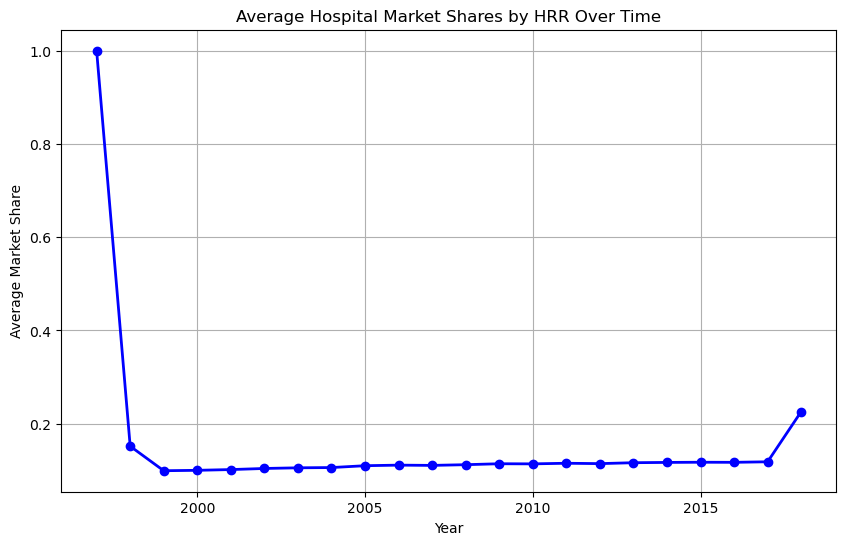

In [69]:
# Calculate average market shares over time
average_market_shares_hrr = data.groupby('year')['mkt_share'].mean()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_market_shares_hrr, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Average Hospital Market Shares by HRR Over Time')
plt.xlabel('Year')
plt.ylabel('Average Market Share')
plt.grid(True)
plt.show()


In [61]:
# Calculate total discharges by community
total_discharges_by_community = data.groupby(['year', 'mkt'])['tot_discharges'].sum()

# Calculate market shares within each community
data['mkt_share_mkt'] = data['tot_discharges'] / data.groupby(['year', 'mkt'])['tot_discharges'].transform('sum')


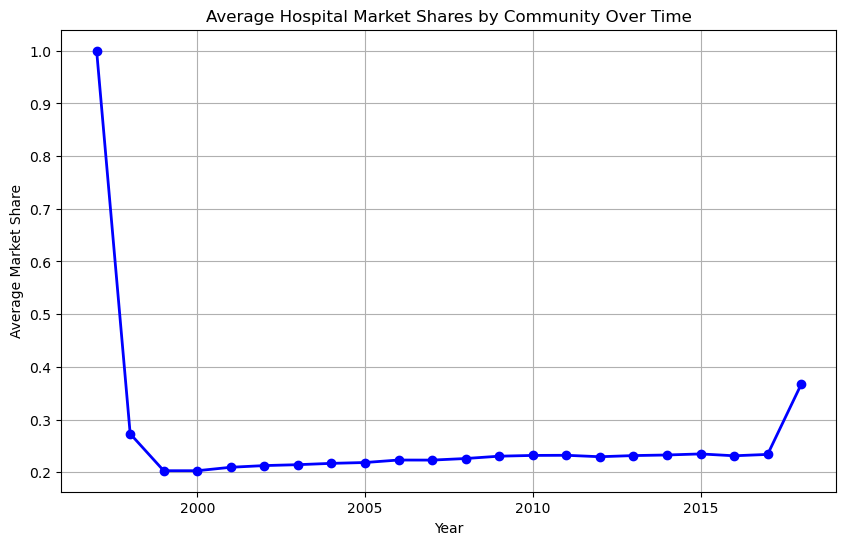

In [64]:
# Calculate average market shares over time within each community
average_market_shares_mkt = data.groupby('year')['mkt_share_mkt'].mean()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_market_shares_mkt, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Average Hospital Market Shares by Community Over Time')
plt.xlabel('Year')
plt.ylabel('Average Market Share')
plt.grid(True)
plt.show()


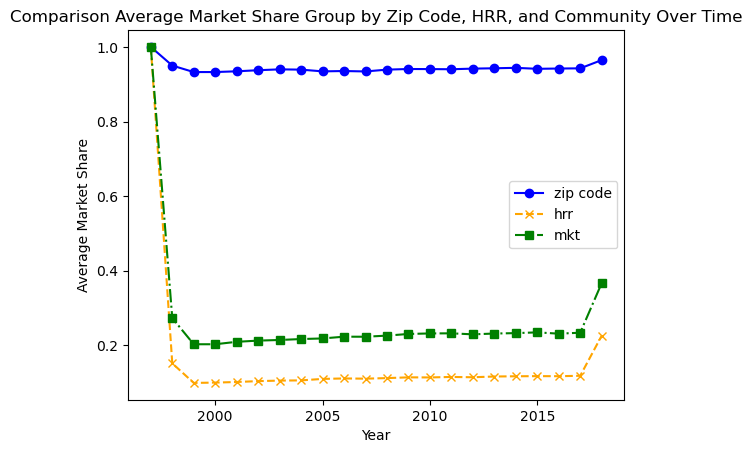

In [70]:

plt.plot(average_mkt_shares, label='zip code', linestyle='-', marker='o', color='blue')
plt.plot(average_market_shares_hrr, label='hrr', linestyle='--', marker='x', color='orange')
plt.plot(average_market_shares_mkt, label='mkt', linestyle='-.', marker='s', color='green')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Market Share')
plt.title('Comparison Average Market Share Group by Zip Code, HRR, and Community Over Time')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

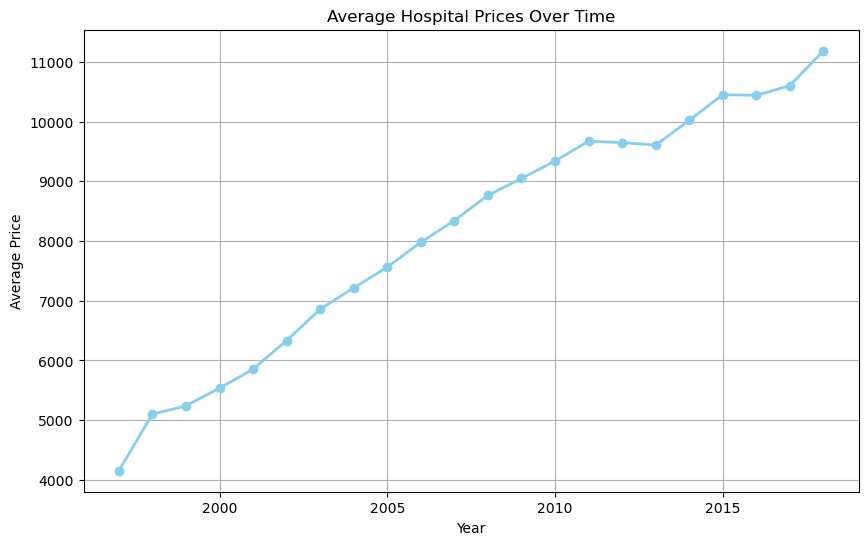

In [20]:
# Calculate average price for each year
average_prices = data.groupby('year')['price'].mean()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Hospital Prices Over Time')
plt.grid(True)
plt.show()

In [39]:
# Group data by 'Community' and 'Year', then check if any community has only one provider (monopolist)
monopolists = data.groupby(['mkt', 'year'])['provider_number'].nunique() == 1

# Filter the original data to keep only records of monopolist providers
monopolist_providers = data[data.set_index(['mkt', 'year']).index.isin(monopolists[monopolists].index)]

# Extract the specific provider numbers that are monopolists
monopolist_provider_numbers = monopolist_providers['provider_number'].unique()

# Print or use monopolist_provider_numbers as needed
print("Monopolist Provider Numbers:", monopolist_provider_numbers)

Monopolist Provider Numbers: [ 10012  10025  10036  10043  10053  10065  10092  10098  10118  10146
  10169  20004  20008  20012  30007  30012  30013  30016  30023  30033
  30035  30043  30062  30067  40002  40014  40015  40024  40039  40041
  40067  40085  40100  40119  50007  50009  50015  50028  50045  50097
  50110  50121  50131  50133  50145  50150  50194  50254  50280  50296
  50301  50315  50331  50334  50335  50366  50367  50407  50417  50444
  50455  50476  50498  50568  50569  60009  60013  60014  60018  60049
  60096  60112  60114  70003  70024  80006 100018 100030 100049 100062
 100071 100081 100098 100105 100118 100137 100150 100175 100212 100213
 100226 100249 100252 100259 100260 100264 100292 110001 110008 110030
 110031 110038 110059 110073 110087 110089 110091 110095 110105 110121
 110146 110149 110165 110168 110183 110191 110200 110205 110212 110215
 110225 120002 130002 130003 130025 130026 130028 130049 140007 140043
 140101 140130 140160 140161 140182 140186 14019

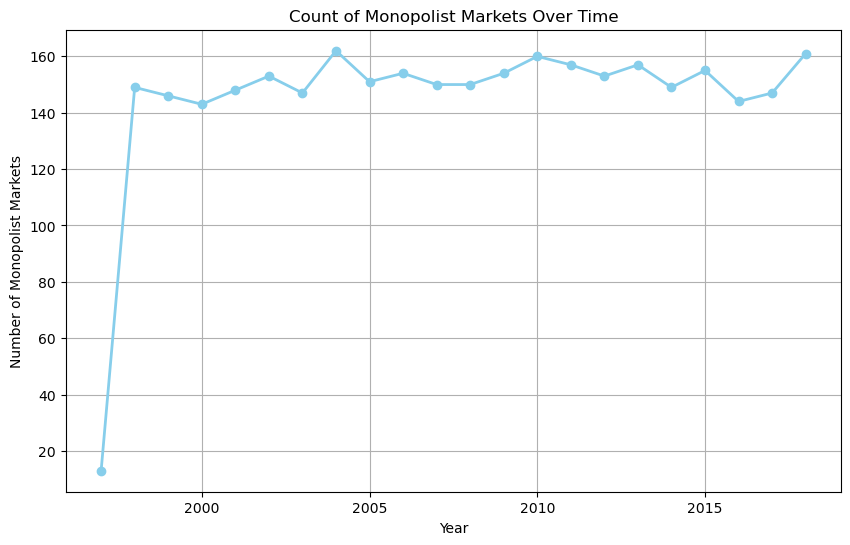

In [23]:
# Count hospitals that are monopolists in their market (community)
monopolists = data.groupby(['year', 'mkt'])['provider_number'].nunique() == 1
monopolists_count = monopolists.groupby('year').sum()

# Create a bar chart to visualize the count of monopolist markets over time
plt.figure(figsize=(10, 6))
plt.plot(monopolists_count.index, monopolists_count.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Monopolist Markets')
plt.title('Count of Monopolist Markets Over Time')
plt.grid(True)
plt.show()

In [38]:
# Group data by 'Community' and 'Year', then count the number of unique hospitals/providers in each community
community_sizes = data.groupby(['mkt', 'year'])['provider_number'].nunique()

# Identify markets with more than 4 hospitals
markets_with_more_than_4_hospitals = community_sizes[community_sizes > 4]

# Print or use markets_with_more_than_4_hospitals as needed
print("Markets with more than 4 hospitals:")
print(markets_with_more_than_4_hospitals)


Markets with more than 4 hospitals:
mkt    year
1.0    1998     8
       1999     9
       2000     9
       2001     8
       2002    10
               ..
653.0  2014     5
       2015     5
       2016     5
       2017     7
       2018     5
Name: provider_number, Length: 3714, dtype: int64


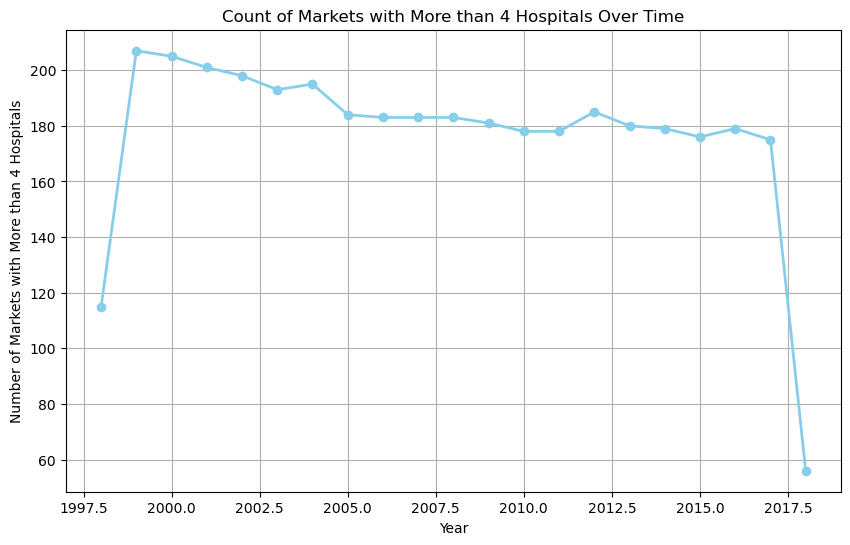

In [24]:
community_sizes = data.groupby(['mkt', 'year'])['provider_number'].nunique()

# Identify markets with more than 4 hospitals
markets_with_more_than_4_hospitals = community_sizes[community_sizes > 4]

# Count the number of markets with more than 4 hospitals over time
market_counts_over_time = markets_with_more_than_4_hospitals.groupby('year').size()

# Create a bar chart to visualize the count of markets with more than 4 hospitals over time
plt.figure(figsize=(10, 6))
plt.plot(market_counts_over_time.index, market_counts_over_time.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Markets with More than 4 Hospitals')
plt.title('Count of Markets with More than 4 Hospitals Over Time')
plt.grid(True)
plt.show()

In [43]:
print(data.columns)

Index(['provider_number', 'street', 'city', 'state', 'zip', 'beds',
       'tot_discharges', 'price', 'year', 'hrr', 'mkt', 'mkt_share'],
      dtype='object')


In [49]:
data['price']

0         5298.301254
1         3903.631715
2         3902.972237
3         3211.728081
4         4255.351889
             ...     
56937     9710.193402
56938     2767.385099
56939     4542.143293
56940    11468.866199
56941    13390.158717
Name: price, Length: 56942, dtype: float64

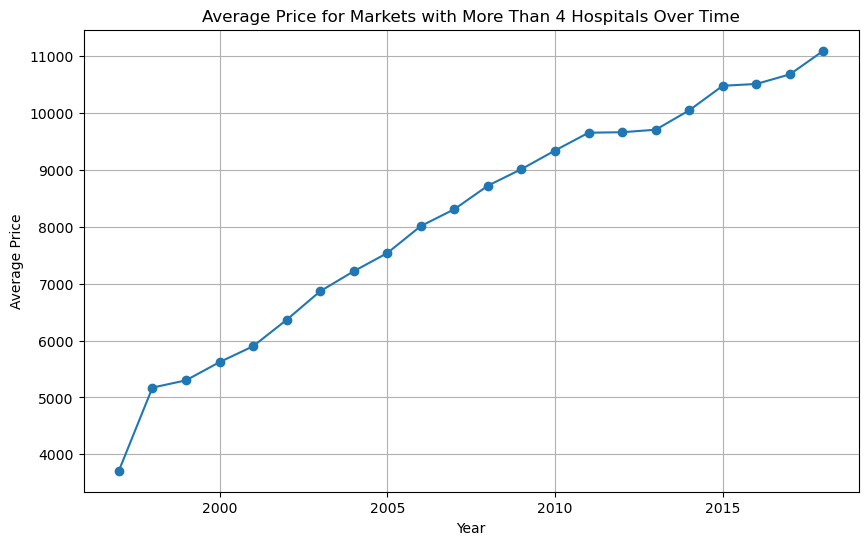

In [50]:
# Count the number of hospitals per market and year
community_sizes = data.groupby(['mkt', 'year'])['provider_number'].nunique()

# Filter markets with more than 4 hospitals
markets_with_more_than_4_hospitals = community_sizes[community_sizes > 4]

# Filter data for markets with more than 4 hospitals
filtered_data = data[data['mkt'].isin(markets_with_more_than_4_hospitals.index.get_level_values('mkt'))]

# Calculate average price for each year among markets with more than 4 hospitals
average_price_more_than_4 = filtered_data.groupby('year')['price'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(average_price_more_than_4['year'], average_price_more_than_4['price'], marker='o', linestyle='-')
plt.title('Average Price for Markets with More Than 4 Hospitals Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

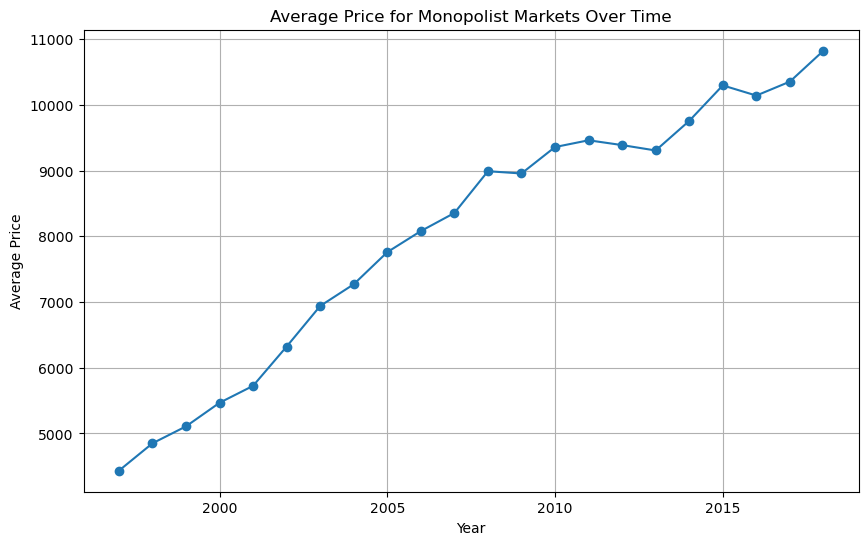

In [51]:
# Count the number of hospitals per market and year
hospital_counts = data.groupby(['mkt', 'year'])['provider_number'].nunique()

# Identify monopolist markets (markets with only one hospital)
monopolists = hospital_counts[hospital_counts == 1]

# Filter data for monopolist markets
filtered_data = data[data['mkt'].isin(monopolists.index.get_level_values('mkt'))]

# Calculate average price for each year among monopolist markets
average_price_monopolists = filtered_data.groupby('year')['price'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(average_price_monopolists['year'], average_price_monopolists['price'], marker='o', linestyle='-')
plt.title('Average Price for Monopolist Markets Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

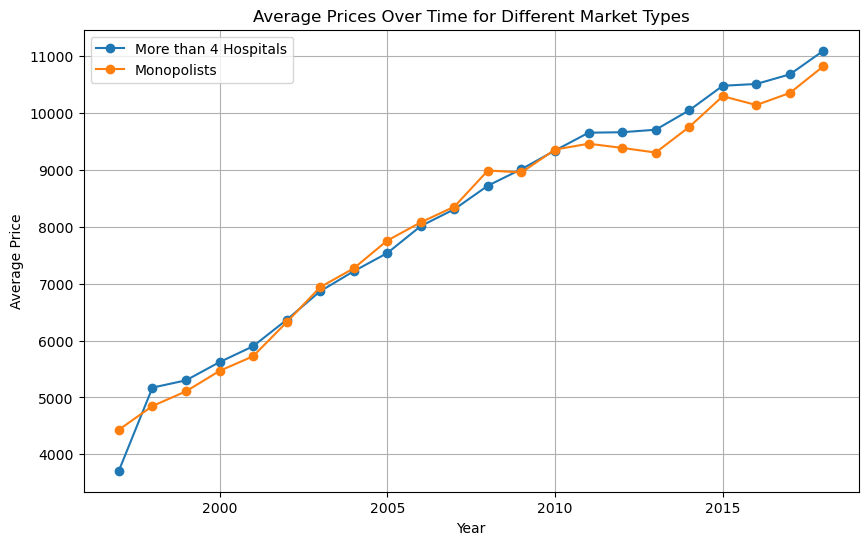

In [52]:
# Count the number of hospitals per market and year
hospital_counts = data.groupby(['mkt', 'year'])['provider_number'].nunique()

# Identify markets with more than 4 hospitals
markets_with_more_than_4_hospitals = hospital_counts[hospital_counts > 4]

# Filter data for markets with more than 4 hospitals
filtered_data_more_than_4 = data[data['mkt'].isin(markets_with_more_than_4_hospitals.index.get_level_values('mkt'))]

# Calculate average price for each year among markets with more than 4 hospitals
average_price_more_than_4 = filtered_data_more_than_4.groupby('year')['price'].mean().reset_index()

# Identify monopolist markets (markets with only one hospital)
monopolists = hospital_counts[hospital_counts == 1]

# Filter data for monopolist markets
filtered_data_monopolists = data[data['mkt'].isin(monopolists.index.get_level_values('mkt'))]

# Calculate average price for each year among monopolist markets
average_price_monopolists = filtered_data_monopolists.groupby('year')['price'].mean().reset_index()

# Plot the results on the same graph
plt.figure(figsize=(10, 6))
plt.plot(average_price_more_than_4['year'], average_price_more_than_4['price'], marker='o', linestyle='-', label='More than 4 Hospitals')
plt.plot(average_price_monopolists['year'], average_price_monopolists['price'], marker='o', linestyle='-', label='Monopolists')
plt.title('Average Prices Over Time for Different Market Types')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()